In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df_sonar=pd.read_excel("sonar.xlsx")
df_sonar

,CM078,CM079,CM080,CM081,CM082,CM083,CM084,CM085,CM086,CM087,...,CM399,CM400,CM430,CM436,CM439,CM443,CM446,CM449,CM453,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df_sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CM078   208 non-null    float64
 1   CM079   208 non-null    float64
 2   CM080   208 non-null    float64
 3   CM081   208 non-null    float64
 4   CM082   208 non-null    float64
 5   CM083   208 non-null    float64
 6   CM084   208 non-null    float64
 7   CM085   208 non-null    float64
 8   CM086   208 non-null    float64
 9   CM087   208 non-null    float64
 10  CM088   208 non-null    float64
 11  CM089   208 non-null    float64
 12  CM090   208 non-null    float64
 13  CM091   208 non-null    float64
 14  CM092   208 non-null    float64
 15  CM094   208 non-null    float64
 16  CM095   208 non-null    float64
 17  CM096   208 non-null    float64
 18  CM097   208 non-null    float64
 19  CM099   208 non-null    float64
 20  CM100   208 non-null    float64
 21  CM101   208 non-null    float64
 22  CM

In [4]:
df_sonar.isnull().sum()

CM078    0
CM079    0
CM080    0
CM081    0
CM082    0
        ..
CM443    0
CM446    0
CM449    0
CM453    0
Class    0
Length: 61, dtype: int64

In [5]:
df_sonar.corr()

,CM078,CM079,CM080,CM081,CM082,CM083,CM084,CM085,CM086,CM087,...,CM398,CM399,CM400,CM430,CM436,CM439,CM443,CM446,CM449,CM453
CM078,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
CM079,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
CM080,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
CM081,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
CM082,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
CM083,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
CM084,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
CM085,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
CM086,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
CM087,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


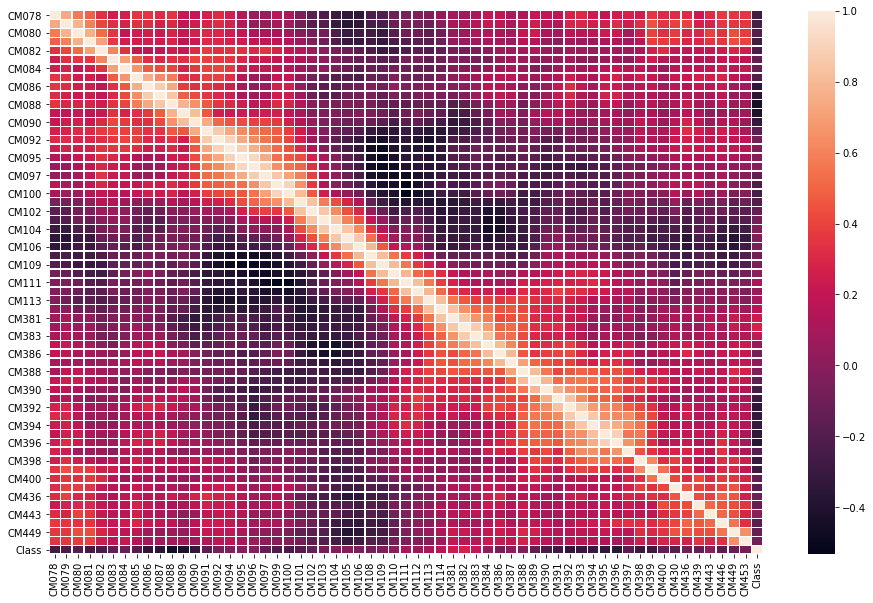

In [21]:
plt.figure(figsize = (16,10))
sns.heatmap(df_sonar.corr(),linewidths=.5)

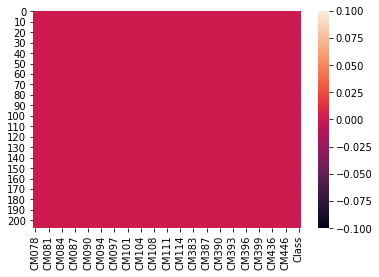

In [7]:
sns.heatmap(df_sonar.isnull())

CM078       AxesSubplot(0.125,0.772143;0.065678x0.107857)
CM079    AxesSubplot(0.203814,0.772143;0.065678x0.107857)
CM080    AxesSubplot(0.282627,0.772143;0.065678x0.107857)
CM081    AxesSubplot(0.361441,0.772143;0.065678x0.107857)
CM082    AxesSubplot(0.440254,0.772143;0.065678x0.107857)
CM083    AxesSubplot(0.519068,0.772143;0.065678x0.107857)
CM084    AxesSubplot(0.597881,0.772143;0.065678x0.107857)
CM085    AxesSubplot(0.676695,0.772143;0.065678x0.107857)
CM086    AxesSubplot(0.755508,0.772143;0.065678x0.107857)
CM087    AxesSubplot(0.834322,0.772143;0.065678x0.107857)
CM088       AxesSubplot(0.125,0.642714;0.065678x0.107857)
CM089    AxesSubplot(0.203814,0.642714;0.065678x0.107857)
CM090    AxesSubplot(0.282627,0.642714;0.065678x0.107857)
CM091    AxesSubplot(0.361441,0.642714;0.065678x0.107857)
CM092    AxesSubplot(0.440254,0.642714;0.065678x0.107857)
CM094    AxesSubplot(0.519068,0.642714;0.065678x0.107857)
CM095    AxesSubplot(0.597881,0.642714;0.065678x0.107857)
CM096    AxesS

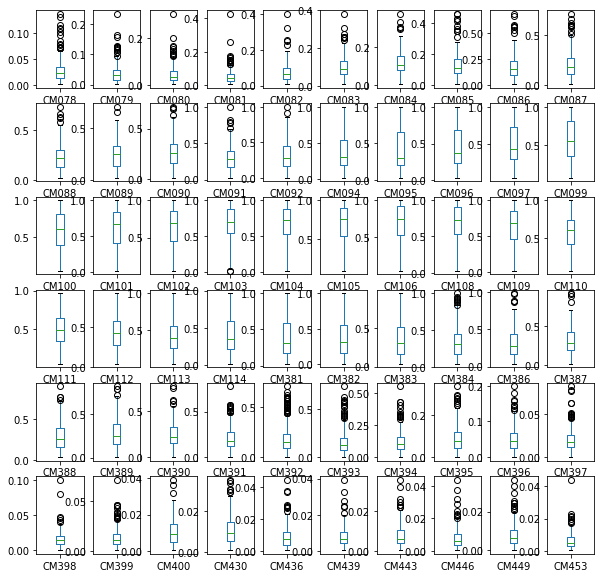

In [8]:
df_sonar.plot(kind='box',subplots=True,layout=(6,10),figsize=(10,10))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


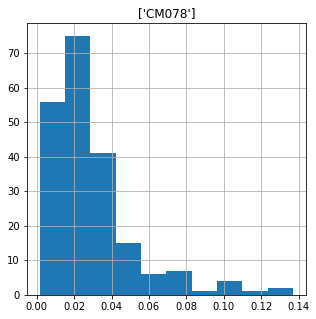

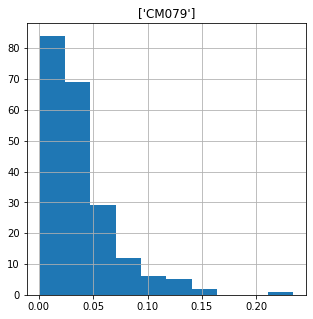

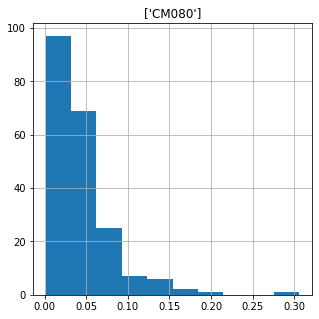

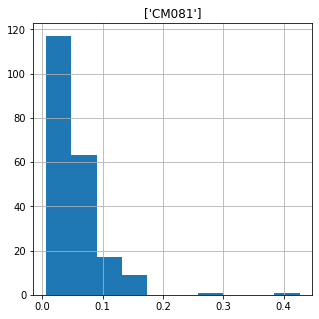

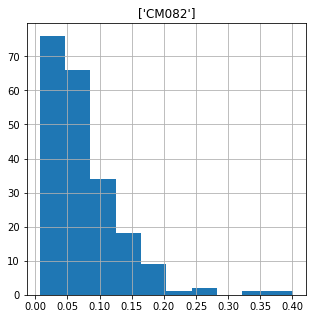

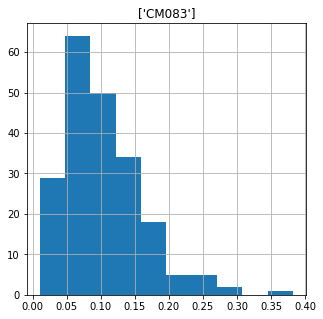

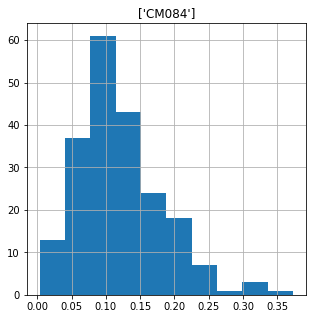

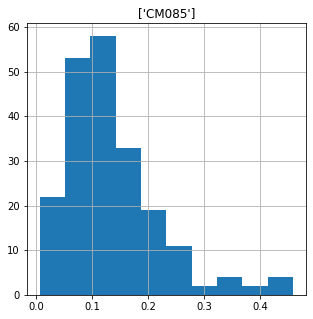

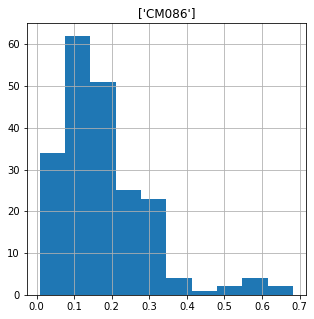

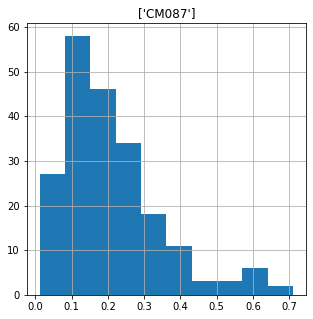

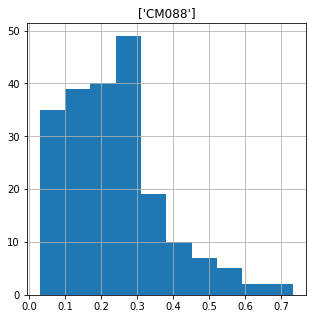

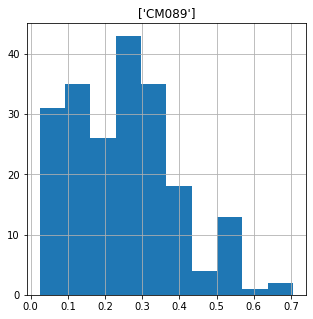

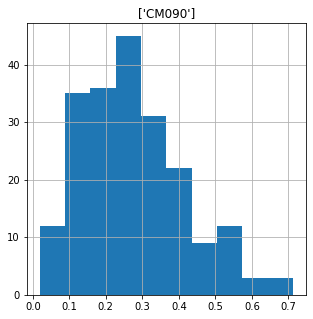

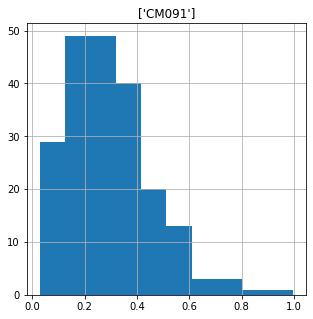

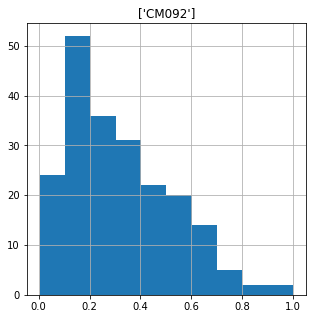

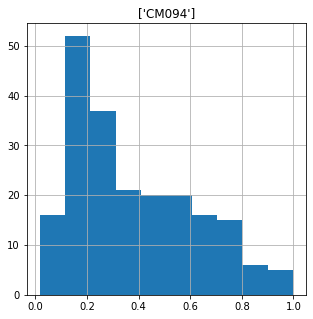

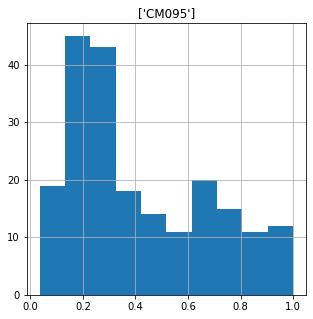

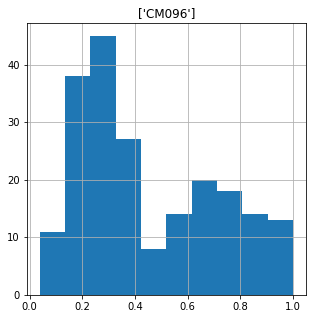

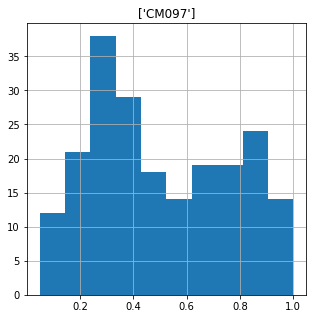

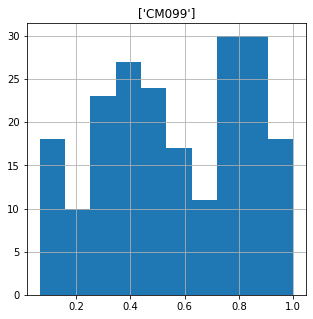

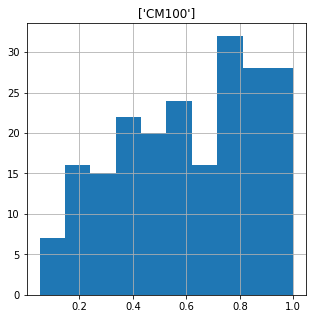

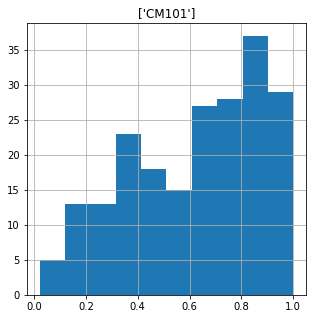

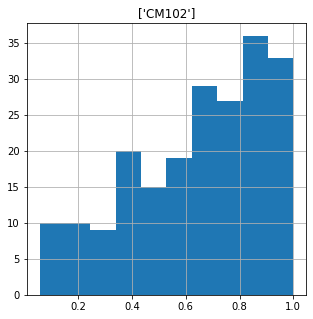

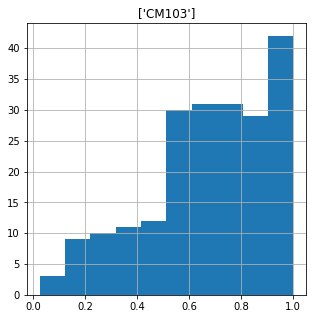

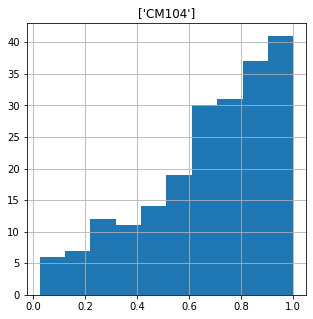

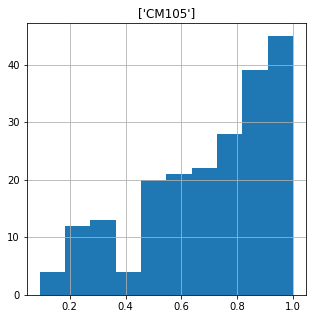

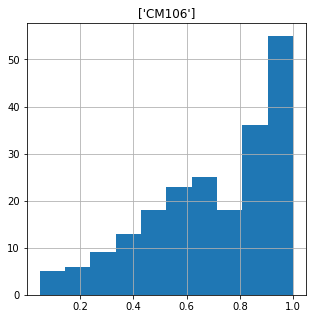

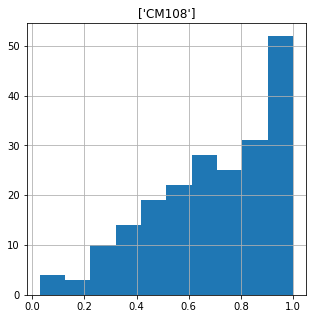

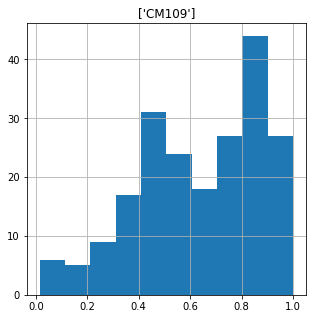

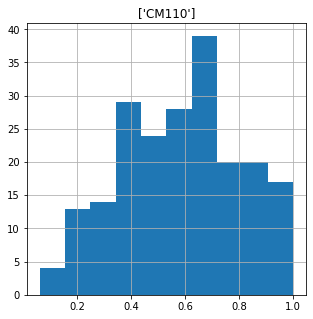

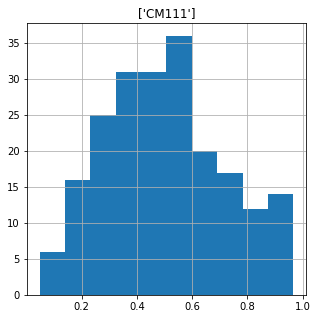

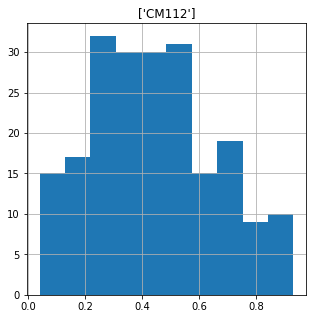

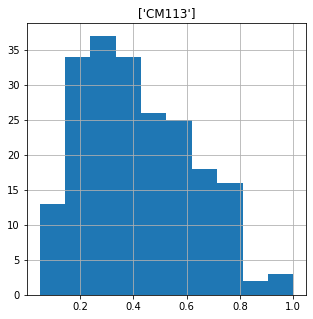

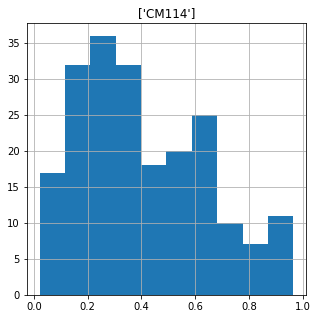

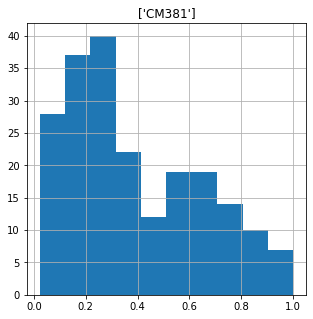

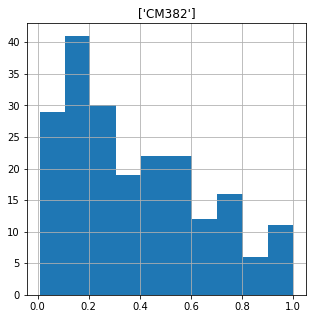

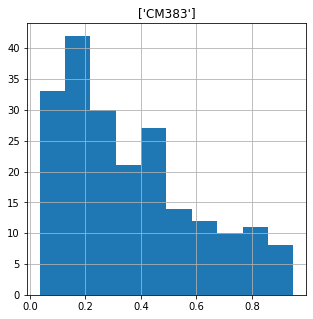

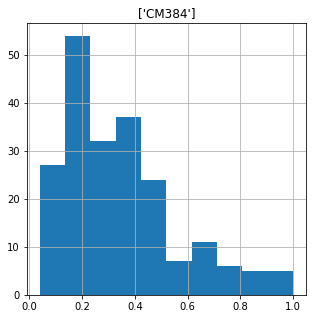

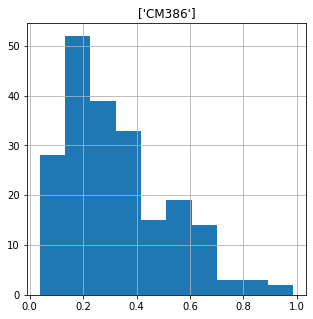

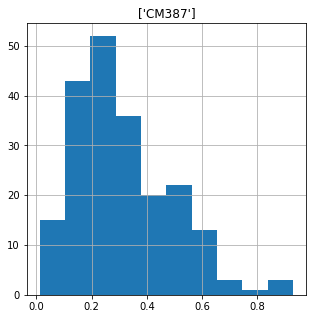

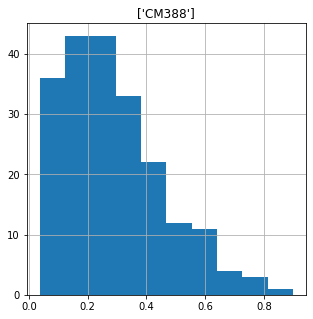

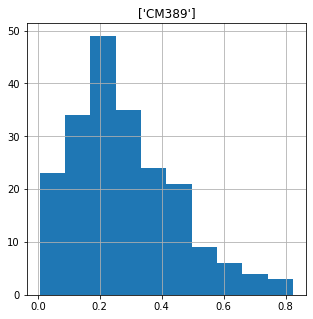

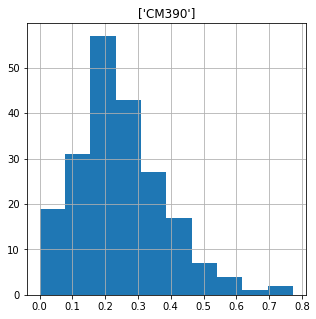

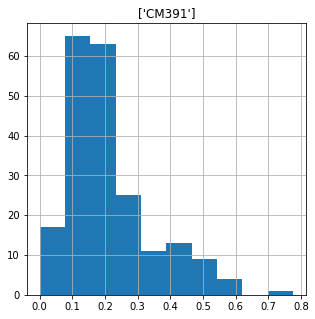

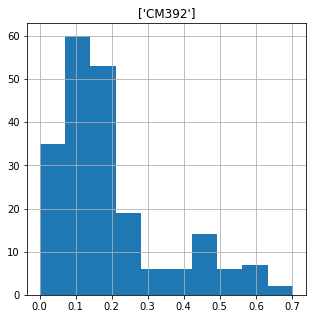

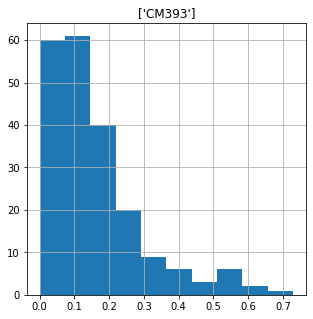

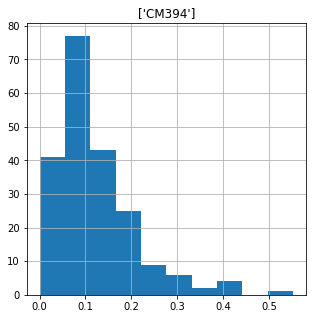

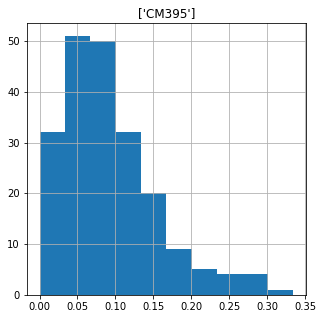

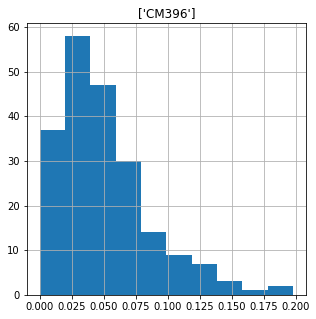

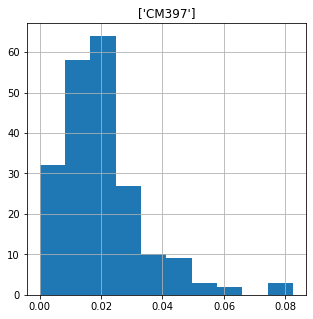

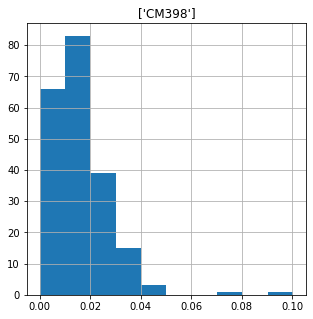

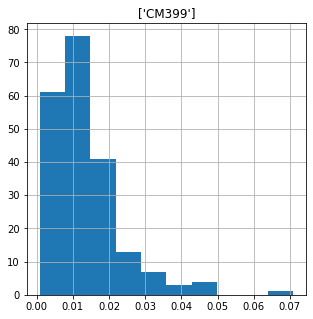

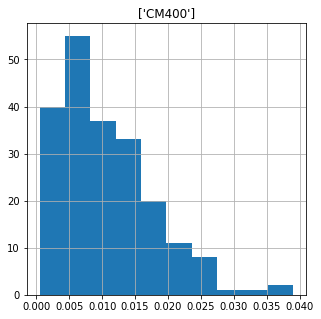

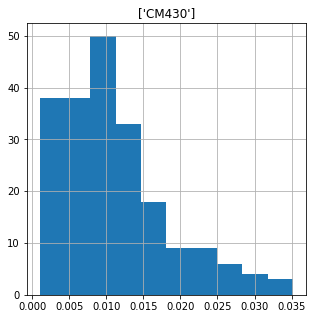

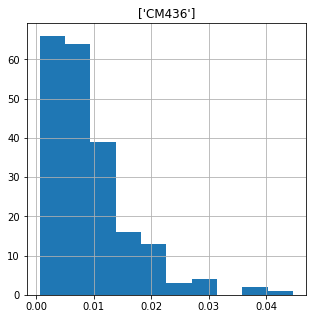

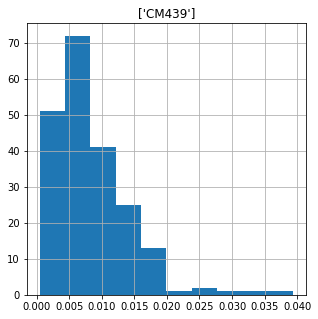

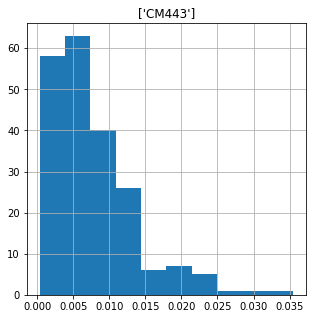

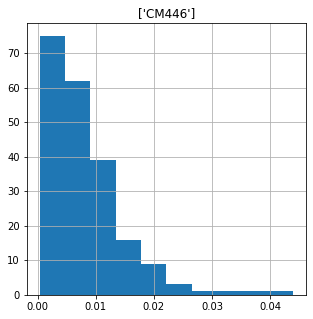

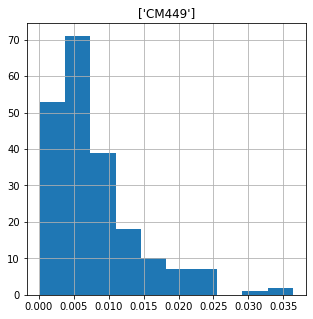

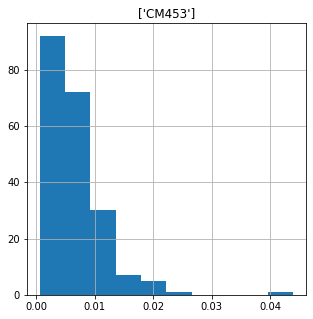

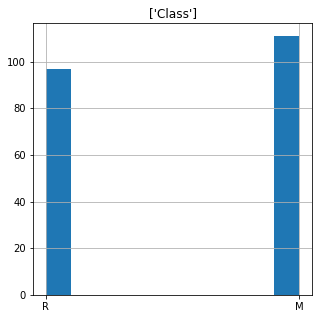

In [9]:
for col in df_sonar.columns:
    plt.figure(figsize = (5,5))
    plt.title([col])
    df_sonar[col].hist()

In [10]:
le=LabelEncoder()
df_sonar["Class"]=le.fit_transform(df_sonar["Class"].astype(str))

In [11]:
df_sonar.head()

,CM078,CM079,CM080,CM081,CM082,CM083,CM084,CM085,CM086,CM087,...,CM399,CM400,CM430,CM436,CM439,CM443,CM446,CM449,CM453,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [12]:
for col in df_sonar.columns:
    if df_sonar.skew().loc[col]>0.55:
        df_sonar[col]=np.log1p(df_sonar[col])

In [13]:
df_sonar.skew()

CM078    2.036001
CM079    1.969917
CM080    2.344713
CM081    2.818320
CM082    1.698684
           ...   
CM443    1.629182
CM446    2.058207
CM449    1.713349
CM453    2.711412
Class    0.135903
Length: 61, dtype: float64

In [15]:
from scipy.stats import zscore
z_score=abs(zscore(df_sonar))
print(df_sonar.shape)
df_sonarf=df_sonar[(z_score<3).all(axis=1)]
print(df_sonarf.shape)

(208, 61)
(173, 61)


In [35]:
df_x=df_sonarf.drop(["Class"],axis=1)
df_x

,CM078,CM079,CM080,CM081,CM082,CM083,CM084,CM085,CM086,CM087,...,CM398,CM399,CM400,CM430,CM436,CM439,CM443,CM446,CM449,CM453
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.022935,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.012423,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.023814,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.015480,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.010346,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.020097,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.005087,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015381,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.004191,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789


In [83]:
y=df_sonarf[["Class"]]
y=y.values.reshape(-1)

In [84]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
sx=ms.fit_transform(df_x)

In [85]:
x=pd.DataFrame(data=sx,columns=df_x.columns)
x

,CM078,CM079,CM080,CM081,CM082,CM083,CM084,CM085,CM086,CM087,...,CM398,CM399,CM400,CM430,CM436,CM439,CM443,CM446,CM449,CM453
0,0.254440,0.315333,0.287576,0.109902,0.429891,0.378155,0.685403,0.487428,0.628739,0.394878,...,0.549767,0.051159,0.233057,0.574030,0.234903,0.841490,0.742845,0.338763,0.366070,0.136534
1,0.595032,0.443389,0.565293,0.454743,0.535223,0.989980,0.940692,1.000000,0.670585,0.528350,...,0.297777,0.204058,0.325891,0.147205,0.312862,0.964250,0.576107,0.192719,0.210167,0.199431
2,0.117483,0.143949,0.419420,0.108438,0.069314,0.117162,0.494427,0.390453,0.112720,0.236083,...,0.570843,0.302846,0.120587,0.539597,0.280990,0.357875,0.198527,0.171814,0.160812,0.580441
3,1.000000,0.562185,0.323653,0.245585,0.257844,0.237710,0.543201,0.733130,0.711542,0.782990,...,0.371056,0.061917,0.190434,0.366971,0.369453,0.057218,0.291135,0.188539,0.435627,0.460694
4,0.371153,0.384647,0.183776,0.085700,0.157837,0.379796,0.539702,0.555005,0.435371,0.556583,...,0.248008,0.099537,0.035047,0.108521,0.024987,0.440510,0.228015,0.100659,0.206057,0.293635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.236712,0.294091,0.107895,0.087904,0.162248,0.634949,0.888813,0.514678,0.479671,0.496126,...,0.481732,0.289517,0.360647,0.726699,0.096283,0.502401,0.261691,0.467693,0.785716,0.788049
169,0.421066,0.083167,0.198302,0.366830,0.338920,0.366651,0.446501,0.311459,0.209679,0.402641,...,0.121940,0.142466,0.341342,0.482140,0.202962,0.306161,0.131048,0.121600,0.251252,0.319773
170,0.686490,0.371165,0.116289,0.171881,0.141633,0.453433,0.564143,0.360663,0.259332,0.469196,...,0.368696,0.406584,0.093390,0.158802,0.199411,0.440510,0.576107,0.563096,0.312801,0.131290
171,0.394108,0.300044,0.329761,0.397894,0.050321,0.526680,0.653873,0.343829,0.403080,0.438389,...,0.100466,0.209407,0.159406,0.447625,0.106966,0.161089,0.131048,0.317930,0.144347,0.220380


In [86]:
x.skew()

CM078    1.217644
CM079    1.193794
CM080    1.485782
CM081    1.142719
CM082    0.831516
CM083    0.740739
CM084    0.277016
CM085    0.720459
CM086    0.682854
CM087    0.615119
CM088    0.610024
CM089    0.240392
CM090    0.418935
CM091    0.529294
CM092    0.563314
CM094    0.593447
CM095    0.472191
CM096    0.547914
CM097    0.242034
CM099   -0.069059
CM100   -0.265099
CM101   -0.462467
CM102   -0.600140
CM103   -0.655188
CM104   -1.001846
CM105   -1.009011
CM106   -0.921146
CM108   -0.821337
CM109   -0.572251
CM110   -0.121108
CM111    0.244851
CM112    0.337200
CM113    0.518587
CM114    0.395393
CM381    0.534375
CM382    0.504511
CM383    0.511634
CM384    0.698489
CM386    0.610151
CM387    0.536968
CM388    0.632249
CM389    0.373082
CM390    0.395752
CM391    0.966464
CM392    1.223486
CM393    0.939716
CM394    1.142862
CM395    0.868007
CM396    0.920530
CM397    0.844699
CM398    0.721949
CM399    1.195551
CM400    0.866670
CM430    0.824444
CM436    1.276746
CM439    0

In [87]:
from scipy.stats import boxcox
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [88]:
x.skew()

CM078    0.780084
CM079    0.763730
CM080    0.990478
CM081    0.660474
CM082    0.505006
CM083    0.335707
CM084    0.277016
CM085    0.276159
CM086    0.348603
CM087    0.239475
CM088    0.244730
CM089    0.240392
CM090    0.418935
CM091    0.529294
CM092    0.284742
CM094    0.369106
CM095    0.472191
CM096    0.547914
CM097    0.242034
CM099   -0.069059
CM100   -0.265099
CM101   -0.462467
CM102   -0.600140
CM103   -0.655188
CM104   -1.001846
CM105   -1.009011
CM106   -0.921146
CM108   -0.821337
CM109   -0.572251
CM110   -0.121108
CM111    0.244851
CM112    0.337200
CM113    0.518587
CM114    0.395393
CM381    0.534375
CM382    0.504511
CM383    0.511634
CM384    0.376743
CM386    0.315549
CM387    0.536968
CM388    0.283335
CM389    0.373082
CM390    0.395752
CM391    0.624091
CM392    0.855360
CM393    0.579399
CM394    0.735103
CM395    0.474510
CM396    0.566962
CM397    0.480875
CM398    0.366945
CM399    0.765654
CM400    0.537847
CM430    0.468674
CM436    0.886498
CM439    0

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [120]:
def alg(alg,x,y):
    m_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.22)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        a_scr=accuracy_score(pred,y_test)
        if a_scr>m_score:
            m_score=a_scr
            final_state=r
    print()
    print("maximum score at random state:",final_state," = ",m_score)
    return final_state

In [121]:
lr=LogisticRegression()
state=alg(lr,x,y)


maximum score at random state: 69  =  0.9230769230769231


In [122]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),x,y,cv=5,scoring="accuracy").mean()

0.7119327731092437

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier()
param={"learning_rate":[0.001,0.01,0.1],'n_estimators':[10,50,100,150,200],"init":[lr]}
gscv=GridSearchCV(gbc,param,cv=10)
gscv.fit(x,y)
gscv.best_params_


{'init': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 50}

In [130]:
gbr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,init=lr)
print("mean score for gradient boosting classifier",cross_val_score(gbr,x,y,cv=5,scoring="accuracy").mean())
print("STD score for gradient boosting classifier",cross_val_score(gbr,x,y,cv=5,scoring="accuracy").std())

mean score for gradient boosting classifier 0.7352941176470589
STD score for gradient boosting classifier 0.12660092672358556


In [125]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
param={"learning_rate":[0.001,0.01,0.1],'n_estimators':[10,50,100,150,200]}
gada=GridSearchCV(abc,param,cv=10)
gada.fit(x,y)
gada.best_params_

{'learning_rate': 0.001, 'n_estimators': 200}

In [131]:
abc=AdaBoostClassifier(base_estimator=lr,learning_rate=0.001,n_estimators=200)
print("mean score for gradient boosting classifier",cross_val_score(abc,x,y,cv=5,scoring="accuracy").mean())
print("STD score for gradient boosting classifier",cross_val_score(abc,x,y,cv=5,scoring="accuracy").std())

mean score for gradient boosting classifier 0.6292436974789916
STD score for gradient boosting classifier 0.1738934671806633


In [132]:
state=alg(gbr,x,y)


maximum score at random state: 45  =  0.9743589743589743


In [133]:
state=alg(abc,x,y)


maximum score at random state: 68  =  0.8461538461538461


In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.22)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("accuracy score: ",accuracy_score(pred,y_test))
print("confusion matrix : \n\n",confusion_matrix(pred,y_test))
print("\nclassification report \n ",classification_report(pred,y_test))


accuracy score:  0.9743589743589743
confusion matrix : 

 [[22  1]
 [ 0 16]]

classification report 
                precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        16

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [135]:
from sklearn.externals import joblib
joblib.dump(gbr,"gbr.sonardata.pkl")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['gbr.sonardata.pkl']